# **Titanic** **EDA** **Dataset**
*Author: MD.Rakibul Hossain .Dated: 26-04-2025 *Contact:rafarakib6113@gmail.com

Description:
I have done an Exploratory Data Analysis (EDA) on famous data set of "Titanic".We convered lot of things.those are given below.you must check.

# Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# *Import Library*

In [2]:
# Immport Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# *Load Dataset*

In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/Mine/IT/titanic.csv.csv")

In [4]:
data.head(3)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


# *Info of Data*

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


# *Statistics of Dataset*


In [6]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Shape of Data

In [7]:
data.shape

(891, 15)

# 1.Null Values

In [8]:
data.isnull().sum().sort_values(ascending=False)

,0
deck,688
age,177
embarked,2
embark_town,2
sex,0
pclass,0
survived,0
fare,0
parch,0
sibsp,0


* Deck Column Have Many Null Values So Its Better To drop this colums



In [9]:
data.drop(columns= 'deck', inplace=True)

In [10]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


* Here we drop deck From Our Dataset

# Impute Null Values in Age by Class Mean

In [11]:
data.age.isnull().sum()

np.int64(177)

* Age Colums is Import to us so we cannot drop Thiss Colums Lets impute null values by mean .

In [12]:
mean =data.groupby("pclass")["age"].mean()

In [13]:
data['age']=data['age'].fillna(data.groupby('pclass')['age'].transform('mean'))

In [14]:
data.age.isnull().sum()

np.int64(0)


* Here We Impute Null Values in Age Colums

# Impute Null values in Embark Town using Mode

In [15]:
data.embark_town.isnull().sum()

np.int64(2)

In [16]:
data["embark_town"] = data["embark_town"].fillna(data["embark_town"].mode()[0])

In [17]:
data.isnull().sum().sort_values(ascending=False)

,0
embarked,2
survived,0
sex,0
age,0
sibsp,0
pclass,0
parch,0
fare,0
class,0
who,0


* Here We Drop Embarked Colums Bcz We have 2 Same Columns So Its Better to drop one of them.

In [18]:
data.drop(columns="embarked", inplace=True)

In [19]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


In [20]:
data.isnull().sum().sort_values(ascending=False)

,0
survived,0
pclass,0
sex,0
age,0
sibsp,0
parch,0
fare,0
class,0
who,0
adult_male,0



# MileStone -1 .. We Imputed all The Null Values

#2.Finding Duplicate Values

In [21]:
data.duplicated().any()

np.True_

In [22]:
data.duplicated().sum()

np.int64(111)


* Here We Have 111 Duplicatedd Values

In [23]:
# Lets Check Duplicates Values
data[ data.duplicated() ].head()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
47,1,3,female,25.14062,0,0,7.7500,Third,woman,False,Queenstown,yes,True
76,0,3,male,25.14062,0,0,7.8958,Third,man,True,Southampton,no,True
77,0,3,male,25.14062,0,0,8.0500,Third,man,True,Southampton,no,True
87,0,3,male,25.14062,0,0,8.0500,Third,man,True,Southampton,no,True
95,0,3,male,25.14062,0,0,8.0500,Third,man,True,Southampton,no,True


In [24]:
data.shape

(891, 13)

* Removing All the Duplicates Values

In [25]:
data.drop_duplicates(inplace=True)

# Removing All the Duplicates Values





In [26]:
print(f"The Shape Of Data After Removing Duplicates {data.shape}")

The Shape Of Data After Removing Duplicates (780, 13)


In [27]:
data.duplicated().sum()

np.int64(0)


# MileStone -2.. Here We Removed All The Duplicates

In [28]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


# Removing Un-usefull Columns From Dataset

In [29]:
# Removing Pclass and adult_male Colums
data.drop(columns="pclass" , inplace=True)
data.drop(columns="adult_male", inplace=True)
data.drop(columns="alive", inplace=True)
data.drop(columns="alone", inplace=True)
data.drop(columns="who", inplace=True)

In [30]:
data.head(3)

,survived,sex,age,sibsp,parch,fare,class,embark_town
0,0,male,22.0,1,0,7.2500,Third,Southampton
1,1,female,38.0,1,0,71.2833,First,Cherbourg
2,1,female,26.0,0,0,7.9250,Third,Southampton


# Lets Make a New Columns Category

In [31]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['Baby', 'child', 'Teen', 'Adult', 'Middle-Aged', 'Old-Aged', 'Senior', 'Elderly']
data["category_age"]= pd.cut(data["age"], bins=bins , labels=labels)

In [32]:
data.head(3)

,survived,sex,age,sibsp,parch,fare,class,embark_town,category_age
0,0,male,22.0,1,0,7.2500,Third,Southampton,Teen
1,1,female,38.0,1,0,71.2833,First,Cherbourg,Adult
2,1,female,26.0,0,0,7.9250,Third,Southampton,Teen





 *  Category Wise Age Count



<ipython-input-33-7915722cfdf0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("category_age")["age"].count().plot(kind="bar")


<Axes: xlabel='category_age'>

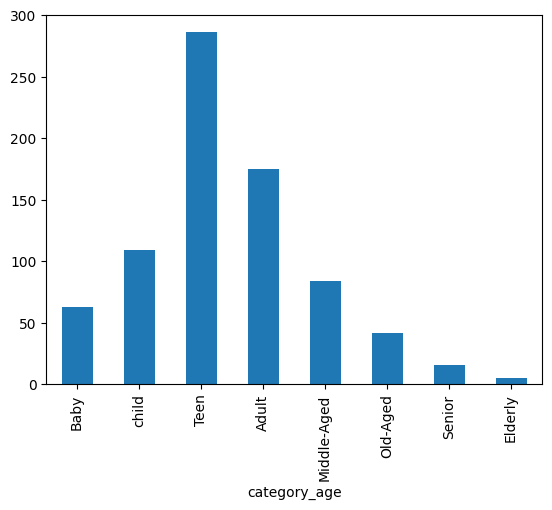

In [33]:
data.groupby("category_age")["age"].count().plot(kind="bar")

# Outliers

* lets deal with outlier in dataset,find outlier and remove outlier





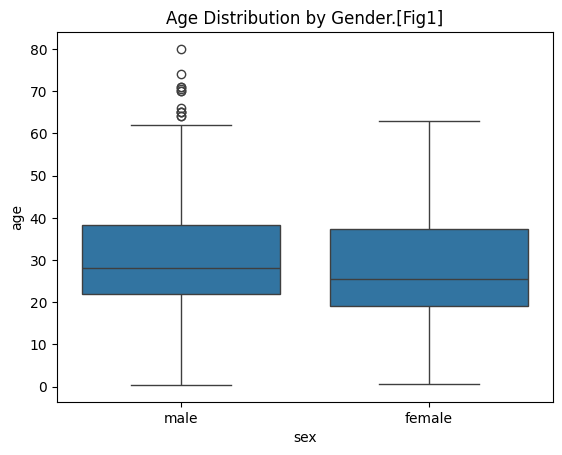

In [34]:
sns.boxplot(data=data , x="sex",y="age")
plt.title("Age Distribution by Gender.[Fig1]")
plt.show()

* In Fig1 we can Clearly see Outlier in the Dataset

# Removing Outliers Using IQR Method

In [35]:
from re import L
Q1 = data["age"].quantile(0.25)
Q3 = data["age"].quantile(0.75)
IQR = Q3 - Q1
#Define the lower and upper bounds for outliers
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
#Identify and print outliers
Outliers = [data[(data["age"] < Lower_bound) | (data["age"] > Upper_bound)]]
print("Outliers:")
print(Outliers)
#Remove outliers
data=data[(data["age"] >= Lower_bound) & (data["age"] <= Upper_bound)]
print(data.head())

Outliers:
[     survived     sex   age  sibsp  parch      fare   class  embark_town  \
33          0    male  66.0      0      0   10.5000  Second  Southampton   
54          0    male  65.0      0      1   61.9792   First    Cherbourg   
96          0    male  71.0      0      0   34.6542   First    Cherbourg   
116         0    male  70.5      0      0    7.7500   Third   Queenstown   
275         1  female  63.0      1      0   77.9583   First  Southampton   
280         0    male  65.0      0      0    7.7500   Third   Queenstown   
438         0    male  64.0      1      4  263.0000   First  Southampton   
456         0    male  65.0      0      0   26.5500   First  Southampton   
483         1  female  63.0      0      0    9.5875   Third  Southampton   
493         0    male  71.0      0      0   49.5042   First    Cherbourg   
545         0    male  64.0      0      0   26.0000   First  Southampton   
630         1    male  80.0      0      0   30.0000   First  Southampton   
6

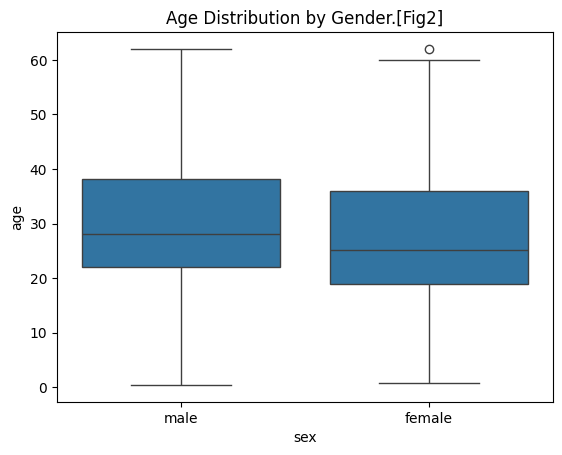

In [36]:
sns.boxplot(data=data , x="sex",y="age")
plt.title("Age Distribution by Gender.[Fig2]")
plt.show()


* In Fig2 Here We Removed Outlier in Age

In [37]:
Q1 = data["fare"].quantile(0.25)
Q3 = data["fare"].quantile(0.75)
IQR = Q3 - Q1
# Define the lower and upper bounds for outliers
Lower_bound = Q1 - 1.5 * IQR
Upper_bound = Q3 + 1.5 * IQR
# Identify and print outliers
Outliers = [data[(data["fare"] < Lower_bound) | (data["fare"] > Upper_bound)]]
print("Outliers:")
print(Outliers)
# Remove outliers
data=data[(data["fare"] >= Lower_bound) & (data["fare"] <= Upper_bound)]
print(data.head())
data.head()

Outliers:
[     survived     sex        age  sibsp  parch      fare  class  embark_town  \
27          0    male  19.000000      3      2  263.0000  First  Southampton   
31          1  female  38.233441      1      0  146.5208  First    Cherbourg   
34          0    male  28.000000      1      0   82.1708  First    Cherbourg   
52          1  female  49.000000      1      0   76.7292  First    Cherbourg   
61          1  female  38.000000      0      0   80.0000  First  Southampton   
..        ...     ...        ...    ...    ...       ...    ...          ...   
829         1  female  62.000000      0      0   80.0000  First  Southampton   
835         1  female  39.000000      1      1   83.1583  First    Cherbourg   
849         1  female  38.233441      1      0   89.1042  First    Cherbourg   
856         1  female  45.000000      1      1  164.8667  First  Southampton   
879         1  female  56.000000      0      1   83.1583  First    Cherbourg   

    category_age  
27       

,survived,sex,age,sibsp,parch,fare,class,embark_town,category_age
0,0,male,22.0,1,0,7.2500,Third,Southampton,Teen
1,1,female,38.0,1,0,71.2833,First,Cherbourg,Adult
2,1,female,26.0,0,0,7.9250,Third,Southampton,Teen
3,1,female,35.0,1,0,53.1000,First,Southampton,Adult
4,0,male,35.0,0,0,8.0500,Third,Southampton,Adult


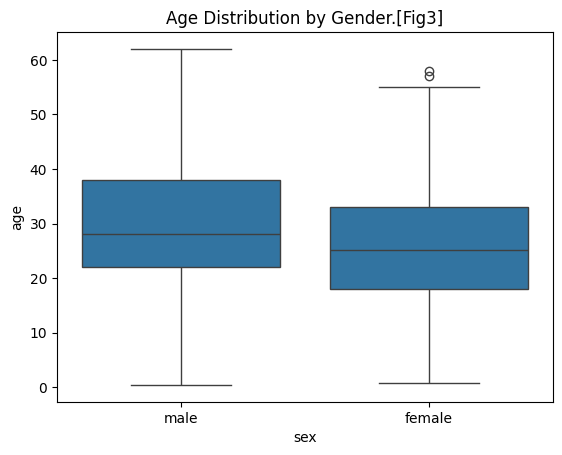

In [38]:
sns.boxplot(data=data , x="sex",y="age")
plt.title("Age Distribution by Gender.[Fig3]")
plt.show()

# * Milestone -3.. All The Outliers Are Removed from Dataset

## Category Wise Fare Check

<ipython-input-39-cc49fdd0b2c3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("category_age")["fare"].sum().plot(kind="barh")


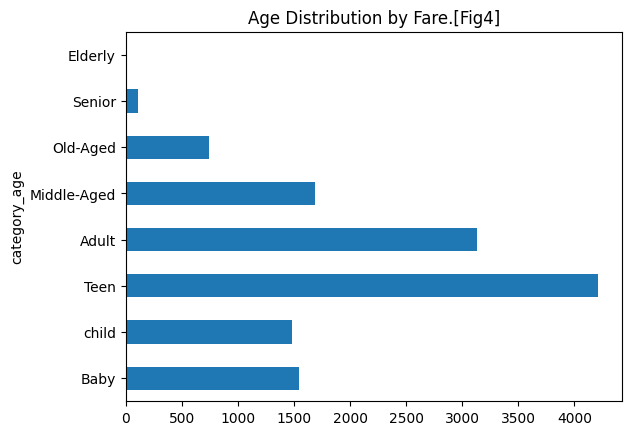

In [39]:
data.groupby("category_age")["fare"].sum().plot(kind="barh")
plt.title("Age Distribution by Fare.[Fig4]")
plt.show()

* Fig4 - We Can see that the teens pays Highest Fare

## Count Age

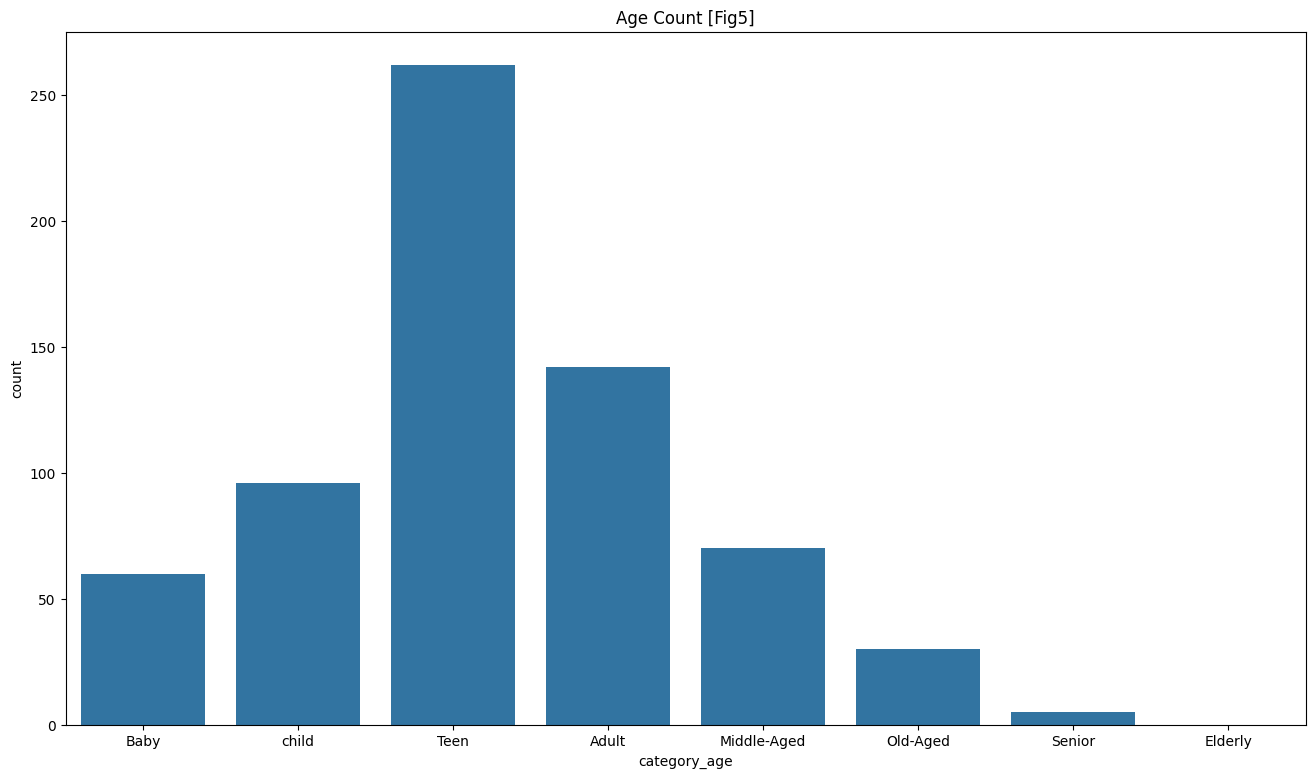

In [40]:
plt.figure(figsize=(16,9))
sns.countplot(data=data , x="category_age")
plt.title("Age Count [Fig5]")
plt.show()

## Category Count Using Plotly

In [41]:
import plotly.express as px
# Assuming you've loaded the penguins dataset into a DataFrame named data
fig =px.histogram(data, x="category_age", color="sex") # Adjusts the layout to group bars for each sex
fig.update_layout(barmode="group", title="Age count By Gender [fig6]")
fig.show()

### Which Pay More Fare Check by Age_Category using Plotly

In [42]:
import plotly.express as px
#Fig size
plt.figure(figsize=(20,9))
#Assuming you've loaded the penguins dataset into a DataFrame named data
fig = px.scatter(data, x="category_age", y="fare",size="fare", color="sex", height=700, width=1000) # Adjusts the layout to group bars for each sex
fig.update_layout(barmode="group", title="Fare count By Age_category [fig7]")
fig.show()

<Figure size 2000x900 with 0 Axes>

In [43]:
import plotly.express as px
fig = px.box(data, x="category_age", y="fare", title="Fare Comarison by Sex [Fig8]")
#fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

## Survived Counts

In [44]:
import plotly.express as pxf
fig = px.histogram(data, x="survived", color="sex")
fig.update_layout(barmode="group", title="Survived Count By Gender [Fig9]")
fig.show()

In [45]:
data.head(3)

,survived,sex,age,sibsp,parch,fare,class,embark_town,category_age
0,0,male,22.0,1,0,7.2500,Third,Southampton,Teen
1,1,female,38.0,1,0,71.2833,First,Cherbourg,Adult
2,1,female,26.0,0,0,7.9250,Third,Southampton,Teen


## Fare Count by Suruvied

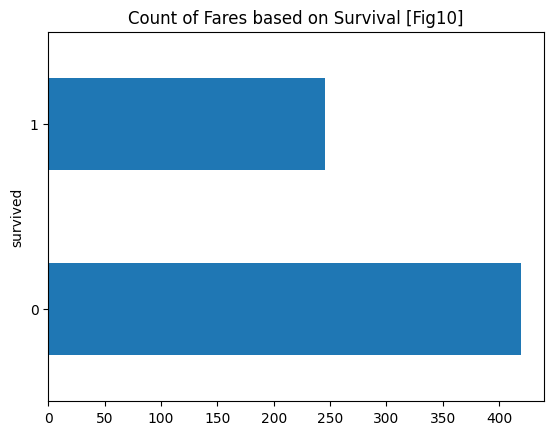

In [46]:
count= data.groupby("survived")["fare"].count().plot(kind="barh")
plt.title("Count of Fares based on Survival [Fig10]")
plt.show()

* From fig 11 . Which Pay Higher Fare Not Survived

# Total Number of People Who Survived And Who not Survived

In [47]:
import plotly.graph_objects as go
count = pd.Series([322,458], index=["Not Survived", "Survived"])
# Create a Plotly bar plot
fig = go.Figure(data=[
    go.Bar(x=count.index, y=count.values)
])
# Update the layout for better visualization
fig.update_layout(
            title="Count of Fares based on Survival",
            xaxis=dict(title="Survival Status"),
            yaxis=dict(title="Fare Count")
)
fig.show()

# Step to Ready Data for Machine Learning

* Data-Scaling-Min-Max scaling





In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data["scaled_fare"] = scaler.fit_transform(data[["fare"]])
data.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,category_age,scaled_fare
0,0,male,22.0,1,0,7.2500,Third,Southampton,Teen,0.101707
1,1,female,38.0,1,0,71.2833,First,Cherbourg,Adult,1.000000
2,1,female,26.0,0,0,7.9250,Third,Southampton,Teen,0.111176
3,1,female,35.0,1,0,53.1000,First,Southampton,Adult,0.744915
4,0,male,35.0,0,0,8.0500,Third,Southampton,Adult,0.112930


In [49]:
scaler = MinMaxScaler()
data["scaled_age"] = scaler.fit_transform(data[["age"]])
data.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,category_age,scaled_fare,scaled_age
0,0,male,22.0,1,0,7.2500,Third,Southampton,Teen,0.101707,0.350438
1,1,female,38.0,1,0,71.2833,First,Cherbourg,Adult,1.000000,0.610263
2,1,female,26.0,0,0,7.9250,Third,Southampton,Teen,0.111176,0.415395
3,1,female,35.0,1,0,53.1000,First,Southampton,Adult,0.744915,0.561546
4,0,male,35.0,0,0,8.0500,Third,Southampton,Adult,0.112930,0.561546


In [50]:
px.box(data , x="sex" , y="scaled_fare")

## Encoding
# Ordinal Encoding

In [51]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder(categories=[["First", "Second", "Third"]])
data["pclass_encoded"] = ordinal_encoder.fit_transform(data[["class"]])
print(data)

     survived     sex       age  sibsp  parch     fare  class  embark_town  \
0           0    male  22.00000      1      0   7.2500  Third  Southampton   
1           1  female  38.00000      1      0  71.2833  First    Cherbourg   
2           1  female  26.00000      0      0   7.9250  Third  Southampton   
3           1  female  35.00000      1      0  53.1000  First  Southampton   
4           0    male  35.00000      0      0   8.0500  Third  Southampton   
..        ...     ...       ...    ...    ...      ...    ...          ...   
885         0  female  39.00000      0      5  29.1250  Third   Queenstown   
887         1  female  19.00000      0      0  30.0000  First  Southampton   
888         0  female  25.14062      1      2  23.4500  Third  Southampton   
889         1    male  26.00000      0      0  30.0000  First    Cherbourg   
890         0    male  32.00000      0      0   7.7500  Third   Queenstown   

    category_age  scaled_fare  scaled_age  pclass_encoded  
0  

In [52]:
data.embark_town.unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [53]:
ordinal_encoder = OrdinalEncoder(categories=[["Southampton", "Cherbourg", "Queenstown"]])
data["embark_encoded"] = ordinal_encoder.fit_transform(data[["embark_town"]])
data.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,category_age,scaled_fare,scaled_age,pclass_encoded,embark_encoded
0,0,male,22.0,1,0,7.2500,Third,Southampton,Teen,0.101707,0.350438,2.0,0.0
1,1,female,38.0,1,0,71.2833,First,Cherbourg,Adult,1.000000,0.610263,0.0,1.0
2,1,female,26.0,0,0,7.9250,Third,Southampton,Teen,0.111176,0.415395,2.0,0.0
3,1,female,35.0,1,0,53.1000,First,Southampton,Adult,0.744915,0.561546,0.0,0.0
4,0,male,35.0,0,0,8.0500,Third,Southampton,Adult,0.112930,0.561546,2.0,0.0


In [54]:
ordinal_encoder = OrdinalEncoder(categories=[["Baby", "child","Teen","Adult","Middle-Aged","Old-Aged","Senior","Elderly"]])
data["category_age_encoded"] = ordinal_encoder.fit_transform(data[["category_age"]])
data.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,category_age,scaled_fare,scaled_age,pclass_encoded,embark_encoded,category_age_encoded
0,0,male,22.0,1,0,7.2500,Third,Southampton,Teen,0.101707,0.350438,2.0,0.0,2.0
1,1,female,38.0,1,0,71.2833,First,Cherbourg,Adult,1.000000,0.610263,0.0,1.0,3.0
2,1,female,26.0,0,0,7.9250,Third,Southampton,Teen,0.111176,0.415395,2.0,0.0,2.0
3,1,female,35.0,1,0,53.1000,First,Southampton,Adult,0.744915,0.561546,0.0,0.0,3.0
4,0,male,35.0,0,0,8.0500,Third,Southampton,Adult,0.112930,0.561546,2.0,0.0,3.0


#Remove Categorical columns




In [55]:
data.drop(columns="sex", inplace=True)
data.drop(columns="class", inplace=True)
data.drop(columns="embark_town", inplace=True)
data.drop(columns="category_age", inplace=True)


In [56]:
data.head()

,survived,age,sibsp,parch,fare,scaled_fare,scaled_age,pclass_encoded,embark_encoded,category_age_encoded
0,0,22.0,1,0,7.2500,0.101707,0.350438,2.0,0.0,2.0
1,1,38.0,1,0,71.2833,1.000000,0.610263,0.0,1.0,3.0
2,1,26.0,0,0,7.9250,0.111176,0.415395,2.0,0.0,2.0
3,1,35.0,1,0,53.1000,0.744915,0.561546,0.0,0.0,3.0
4,0,35.0,0,0,8.0500,0.112930,0.561546,2.0,0.0,3.0
